YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


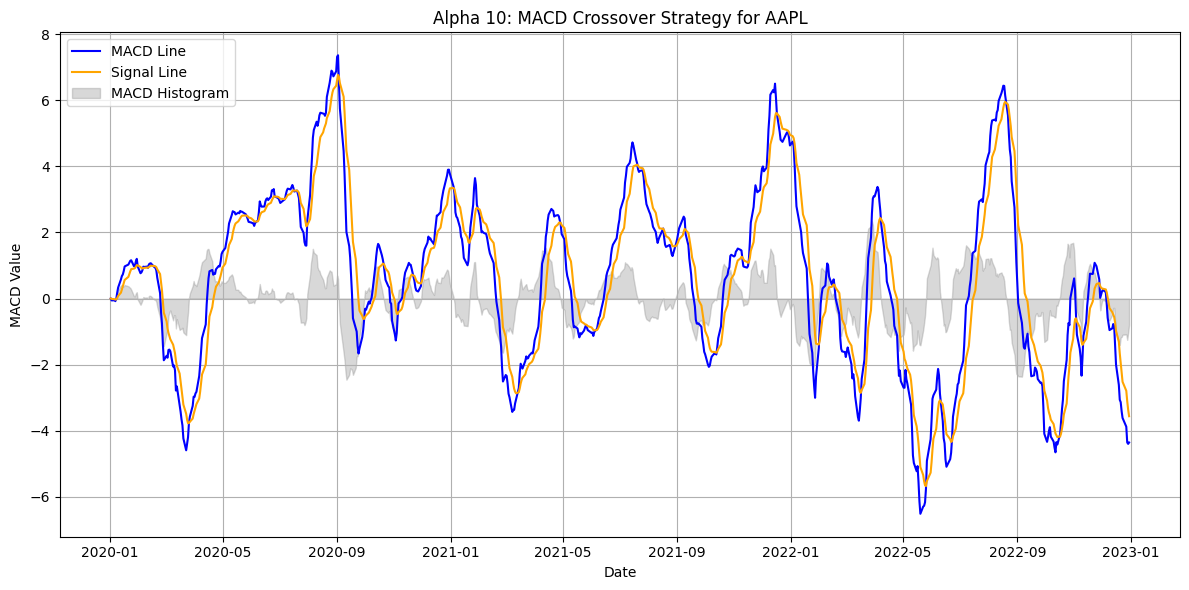

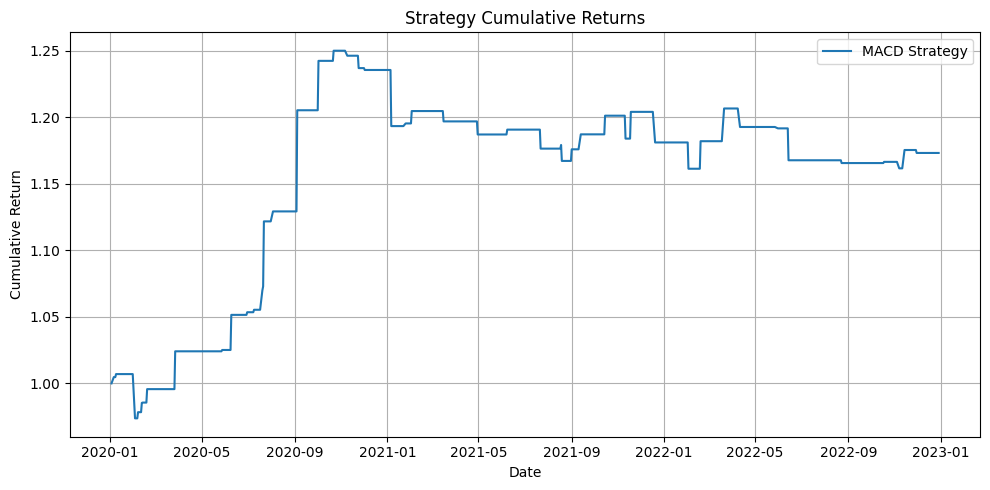

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# === Download historical data ===
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# === Extract 'Close' price ===
price = data[('Close', 'AAPL')] if isinstance(data.columns, pd.MultiIndex) else data['Close']

# === MACD Calculations ===
ema12 = price.ewm(span=12, adjust=False).mean()
ema26 = price.ewm(span=26, adjust=False).mean()
macd_line = ema12 - ema26
signal_line = macd_line.ewm(span=9, adjust=False).mean()
macd_hist = macd_line - signal_line

# === Generate Signals ===
signals = pd.Series(0, index=price.index)
signals[(macd_line > signal_line) & (macd_line.shift(1) <= signal_line.shift(1))] = 1   # Buy
signals[(macd_line < signal_line) & (macd_line.shift(1) >= signal_line.shift(1))] = -1  # Sell

# === Backtest ===
daily_returns = price.pct_change().shift(-1)
strategy_returns = signals.shift(1) * daily_returns
cumulative_returns = (1 + strategy_returns).cumprod()

# === Plot MACD & Signal Line ===
plt.figure(figsize=(12, 6))
plt.plot(macd_line, label='MACD Line', color='blue')
plt.plot(signal_line, label='Signal Line', color='orange')
plt.fill_between(macd_hist.index, macd_hist, 0, color='gray', alpha=0.3, label='MACD Histogram')
plt.title(f'Alpha 10: MACD Crossover Strategy for {ticker}')
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot Cumulative Returns ===
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='MACD Strategy')
plt.title("Strategy Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
